# LEAD SCORE CASE STUDY

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.
The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.
There are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.
X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%

## Our  Goals for case study


-  **build a logistic regression modco. 
-  **adjust ttsthe company's requirem.ll.

### Steps:

1)Reading and Understanding the Data

2)Cleaning the Data

3)Preparing the data for Modelling 

4)Model Building 

5)Model Evaluation

6)Predictions and Summary

### IMPORTING THE NECCESSARY LIBRARIES

In [286]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import precision_recall_curve

### READING AND UNDERSTANDING THE DATA

In [199]:
leads=pd.read_csv("Leads.csv")

In [200]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [201]:
leads.shape

(9240, 37)

In [202]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [203]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### CLEANING THE DATA

In [204]:
(leads.isnull().sum())

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

##### Analysing Null values percentage for each and every columns and dropping the columns that has more than 30% of null values

In [205]:
# Drop all the columns in which greater than 3000 missing values are present

for col in leads.columns:
    if leads[col].isnull().sum() > 3000:
        leads.drop(col,axis=1, inplace=True)

In [206]:
leads.drop(['City'], axis = 1, inplace = True)

In [207]:
# Same goes for the variable 'Country'

leads.drop(['Country'], axis = 1, inplace = True)

In [208]:
# Get the value counts of all the columns

for column in leads:
    print(leads[column].astype('category').value_counts())
    print('___________________________________________________')

Prospect ID
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: count, Length: 9240, dtype: int64
___________________________________________________
Lead Number
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: count, Length: 9240, dtype: int64
___________________________________________________
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64


In [209]:
(leads.isnull().sum())/9240*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

##### We do have null values to be taken care meanwhile it was stated in the problem statement that we have a category called "Select" which can be as good as null values 
Lets Identify which all are the columns has the category "Select"

In [210]:
leads['Lead Profile'].astype('category').value_counts()

Lead Profile
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

In [211]:
leads['How did you hear about X Education'].value_counts()

How did you hear about X Education
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64

In [212]:
leads['Specialization'].value_counts()

Specialization
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [213]:
leads.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)

In [214]:
leads.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [215]:
leads['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [216]:
# Drop the null value rows present in the variable 'What matters most to you in choosing a course'

leads.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

###### Dropping because only few categories are present 

In [217]:
for i in leads.columns:
    print(leads[i].value_counts())
    print("----------------------------------------")

Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: count, Length: 9240, dtype: int64
----------------------------------------
Lead Number
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: count, Length: 9240, dtype: int64
----------------------------------------
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
----------------------

In [218]:
leads = leads[~pd.isnull(leads['What is your current occupation'])]

In [219]:
# Drop the null value rows in the column 'TotalVisits'

leads = leads[~pd.isnull(leads['TotalVisits'])]

In [220]:
# Drop the null values rows in the column 'Lead Source'

leads = leads[~pd.isnull(leads['Lead Source'])]

In [221]:
# Drop the null values rows in the column 'Specialization'

leads = leads[~pd.isnull(leads['Specialization'])]

##### checking on the other categorical variables:

In [222]:
(leads.isnull().sum())/9240*100

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [223]:
leads.shape

(6373, 14)

###### Now we have 0 null values

In [224]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


##### "Prospect ID" and "Lead Number" is not needed for analysis,hence Dropping them

In [225]:
leads.drop(['Prospect ID', 'Lead Number'], axis=1, inplace = True)

In [226]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


In [227]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6373 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6373 non-null   object 
 1   Lead Source                             6373 non-null   object 
 2   Do Not Email                            6373 non-null   object 
 3   Converted                               6373 non-null   int64  
 4   TotalVisits                             6373 non-null   float64
 5   Total Time Spent on Website             6373 non-null   int64  
 6   Page Views Per Visit                    6373 non-null   float64
 7   Last Activity                           6373 non-null   object 
 8   Specialization                          6373 non-null   object 
 9   What is your current occupation         6373 non-null   object 
 10  A free copy of Mastering The Interview  6373 non-null   object 
 

In [228]:
leads.shape

(6373, 12)

##### This is our final Dataset after Cleaning 
**We have about 13 columns and 6373 rows*

**Total Visits,Total Time Spent on Website,Page Views Per Visit are continuous variables and all other are categorical variables*

#### Data Vistualization 

<Axes: >

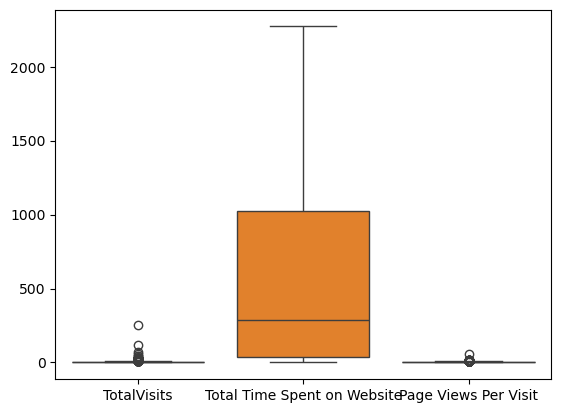

In [229]:
sns.boxplot(leads[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]])

##### There is not much of a outlier Problem

##### Comparing the Continous variables vs Target Variable

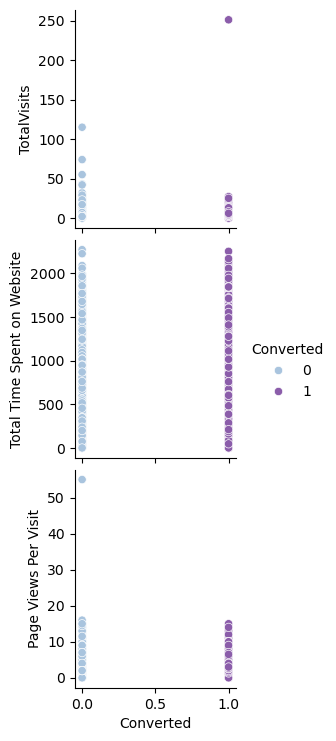

In [230]:
sns.pairplot(data=leads,x_vars=["Converted"],y_vars=["TotalVisits","Total Time Spent on Website","Page Views Per Visit"],hue="Converted",palette='BuPu')

### Preparing the data for Modelling

In [231]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


##### Creating Dummy Variables

In [232]:
# Check the columns which are of type 'object'

temp = leads.loc[:, leads.dtypes == 'object']
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [233]:
# Create dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity']], drop_first=True,dtype="int")

# Add the results to the master dataframe
leads = pd.concat([leads, dummy], axis=1)

In [234]:
# Creating dummy variable separately for the variable 'Specialization' since it has the level 'Select' which is useless so we
# drop that level by specifying it explicitly

dummy_spl = pd.get_dummies(leads['Specialization'], prefix = 'Specialization',dtype="int")
dummy_spl = dummy_spl.drop(['Specialization_Select'], axis=1)
leads = pd.concat([leads, dummy_spl], axis = 1)

In [235]:
# Drop the variables for which the dummy variables have been created

leads = leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], axis=1)

In [236]:
leads.shape

(6373, 75)

In [237]:
leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


##### Train Test Data Split 

In [238]:
# Put all the feature variables in X

X =leads.drop(['Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [239]:
# Put the target variable in y

y = leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [240]:
# Split the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [241]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4461, 74)
(1912, 74)
(4461,)
(1912,)


In [242]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
8003,4.0,67,2.0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
218,4.0,187,4.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4171,6.0,78,6.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4037,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3660,0.0,0,0.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [243]:
X_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]]

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
8003,4.0,67,2.0
218,4.0,187,4.0
4171,6.0,78,6.0
4037,0.0,0,0.0
3660,0.0,0,0.0
...,...,...,...
8759,0.0,0,0.0
100,7.0,1633,3.5
5877,3.0,1709,3.0
8658,4.0,425,2.0


##### Scaling the X_train

In [244]:
scaler=StandardScaler()

In [245]:
X_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]]=scaler.fit_transform(X_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]])

In [246]:
X_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,4.461000e+03,4.461000e+03,4.461000e+03
mean,3.663412e-17,1.592788e-18,-3.026297e-17
std,1.000112e+00,1.000112e+00,1.000112e+00
min,-6.691905e-01,-9.430217e-01,-1.201013e+00
25%,-4.856743e-01,-8.845936e-01,-7.123324e-01
50%,-1.186418e-01,-4.384149e-01,-2.236517e-01
75%,2.483907e-01,8.611688e-01,5.924451e-01
max,4.539339e+01,3.079668e+00,6.617878e+00


In [247]:
X_train.columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn',
       'Lead Source_Welingak Website', 'Lead Source_bing',
       'Lead Source_testone', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olar

###### Now we have our Scaled X_train data and y train ,we can build the model 

### MODEL BUILDING

In [248]:
logreg=LogisticRegression()

In [249]:
rfe=RFE(logreg,n_features_to_select=15)

In [250]:
rfe=rfe.fit(X_train,y_train)

In [251]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', False, 39),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 41),
 ('Lead Origin_Landing Page Submission', False, 7),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 56),
 ('Lead Source_Direct Traffic', False, 25),
 ('Lead Source_Facebook', False, 53),
 ('Lead Source_Google', False, 29),
 ('Lead Source_Live Chat', False, 45),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 28),
 ('Lead Source_Pay per Click Ads', False, 42),
 ('Lead Source_Press_Release', False, 55),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 30),
 ('Lead Source_Social Media', False, 60),
 ('Lead Source_WeLearn', False, 38),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 27),
 ('Lead Source_testone', False, 37),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 22),
 ('Last Activity_Email Bounced', False, 3),
 ('Last Activity_Email Link

In [252]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

In [253]:
# Select only the columns selected by RFE

X_train = X_train[col]

In [254]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm2= sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2038.7
Date:                Sat, 18 May 2024   Deviance:                       4077.4
Time:                        12:43:41   Pearson chi2:                 4.69e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3756
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6583      0.602      1.094      0.274      -0.521       1.838
Total Time Spent on Website                              1.0948      0.046     23.674      0.000       1.004       1.185
Lead Origin_Lead Add Form                                2.8029      1.219      2.299      0.022       0.413       5.193
Lead Source_Olark Chat                                   1.2977      0.114     11.342      0.000       1.073       1.522
Lead Source_Reference                                    1.2756      1.243      1.026      0.305      -1.161       3.712
Lead Source_Welingak Website                             3.2908      1.580      2.082      0.037       0.193       6.388
Do Not Email_Yes                                        -1.4166      0.193     -7.327      0.000      -1.795      -1.038
Last Activity_Had a Phone Conversation                   1.6253      0.984      1.652      0.099      -0.304       3.554
Last Activity_SMS Sent                                   0.9927      0.084     11.771      0.000       0.827       1.158
What is your current occupation_Housewife               22.4128   2.39e+04      0.001      0.999   -4.69e+04    4.69e+04
What is your current occupation_Student                 -1.3322      0.639     -2.085      0.037      -2.585      -0.080
What is your current occupation_Unemployed              -1.4578      0.603     -2.418      0.016      -2.639      -0.276
What is your current occupation_Working Professional     1.1501      0.632      1.820      0.069      -0.088       2.389
Last Notable Activity_Had a Phone Conversation          22.4823   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Modified                          -0.8433      0.090     -9.400      0.000      -1.019      -0.667
Last Notable Activity_Unreachable                        2.4696      0.807      3.061      0.002       0.888       4.051
========================================================================================================================
"""

In [153]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,84.15
3,Lead Source_Reference,65.19
4,Lead Source_Welingak Website,20.03
6,Last Activity_Had a Phone Conversation,2.45
12,Last Notable Activity_Had a Phone Conversation,2.44
10,What is your current occupation_Unemployed,2.43
7,Last Activity_SMS Sent,1.68
13,Last Notable Activity_Modified,1.57
2,Lead Source_Olark Chat,1.37
11,What is your current occupation_Working Profes...,1.31


In [154]:
variance_inflation_factor

<function statsmodels.stats.outliers_influence.variance_inflation_factor(exog, exog_idx)>

In [155]:
X_train.drop('Lead Source_Reference', axis = 1, inplace = True)

In [156]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2039.1
Date:                Sat, 18 May 2024   Deviance:                       4078.2
Time:                        12:17:33   Pearson chi2:                 4.67e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3755
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6590      0.602      1.095      0.273      -0.520       1.838
Total Time Spent on Website                              1.0948      0.046     23.672      0.000       1.004       1.185
Lead Origin_Lead Add Form                                4.0401      0.256     15.794      0.000       3.539       4.541
Lead Source_Olark Chat                                   1.2976      0.114     11.340      0.000       1.073       1.522
Lead Source_Welingak Website                             2.0535      1.037      1.980      0.048       0.020       4.087
Do Not Email_Yes                                        -1.4149      0.193     -7.325      0.000      -1.794      -1.036
Last Activity_Had a Phone Conversation                   1.6255      0.984      1.652      0.099      -0.303       3.554
Last Activity_SMS Sent                                   0.9929      0.084     11.774      0.000       0.828       1.158
What is your current occupation_Housewife               22.4142   2.39e+04      0.001      0.999   -4.69e+04    4.69e+04
What is your current occupation_Student                 -1.3317      0.639     -2.084      0.037      -2.584      -0.080
What is your current occupation_Unemployed              -1.4586      0.603     -2.420      0.016      -2.640      -0.277
What is your current occupation_Working Professional     1.1503      0.632      1.821      0.069      -0.088       2.389
Last Notable Activity_Had a Phone Conversation          22.4824   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Modified                          -0.8434      0.090     -9.403      0.000      -1.019      -0.668
Last Notable Activity_Unreachable                        2.4700      0.807      3.062      0.002       0.889       4.051
========================================================================================================================
"""

In [157]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Last Activity_Had a Phone Conversation,2.45
11,Last Notable Activity_Had a Phone Conversation,2.44
9,What is your current occupation_Unemployed,2.43
6,Last Activity_SMS Sent,1.68
1,Lead Origin_Lead Add Form,1.65
12,Last Notable Activity_Modified,1.57
2,Lead Source_Olark Chat,1.37
3,Lead Source_Welingak Website,1.33
10,What is your current occupation_Working Profes...,1.31
0,Total Time Spent on Website,1.28


In [158]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [159]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2041.1
Date:                Sat, 18 May 2024   Deviance:                       4082.2
Time:                        12:17:35   Pearson chi2:                 4.67e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3749
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6621      0.602      1.101      0.271      -0.517       1.841
Total Time Spent on Website                              1.0934      0.046     23.650      0.000       1.003       1.184
Lead Origin_Lead Add Form                                4.0398      0.256     15.790      0.000       3.538       4.541
Lead Source_Olark Chat                                   1.2964      0.114     11.329      0.000       1.072       1.521
Lead Source_Welingak Website                             2.0524      1.037      1.978      0.048       0.019       4.086
Do Not Email_Yes                                        -1.4145      0.193     -7.323      0.000      -1.793      -1.036
Last Activity_Had a Phone Conversation                   2.8923      0.799      3.621      0.000       1.327       4.458
Last Activity_SMS Sent                                   0.9911      0.084     11.756      0.000       0.826       1.156
What is your current occupation_Housewife               21.4143   1.45e+04      0.001      0.999   -2.84e+04    2.85e+04
What is your current occupation_Student                 -1.3321      0.639     -2.085      0.037      -2.584      -0.080
What is your current occupation_Unemployed              -1.4585      0.603     -2.420      0.016      -2.640      -0.277
What is your current occupation_Working Professional     1.1492      0.632      1.819      0.069      -0.089       2.387
Last Notable Activity_Modified                          -0.8522      0.090     -9.511      0.000      -1.028      -0.677
Last Notable Activity_Unreachable                        2.4663      0.807      3.057      0.002       0.885       4.047
========================================================================================================================
"""

In [160]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [161]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2043.1
Date:                Sat, 18 May 2024   Deviance:                       4086.2
Time:                        12:17:36   Pearson chi2:                 4.68e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3744
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.1870      0.552      2.148      0.032       0.104       2.270
Total Time Spent on Website                              1.0930      0.046     23.647      0.000       1.002       1.184
Lead Origin_Lead Add Form                                4.0395      0.256     15.792      0.000       3.538       4.541
Lead Source_Olark Chat                                   1.2949      0.114     11.315      0.000       1.071       1.519
Lead Source_Welingak Website                             2.0525      1.037      1.979      0.048       0.019       4.086
Do Not Email_Yes                                        -1.4186      0.193     -7.334      0.000      -1.798      -1.039
Last Activity_Had a Phone Conversation                   2.8916      0.799      3.620      0.000       1.326       4.457
Last Activity_SMS Sent                                   0.9914      0.084     11.760      0.000       0.826       1.157
What is your current occupation_Student                 -1.8569      0.593     -3.131      0.002      -3.019      -0.695
What is your current occupation_Unemployed              -1.9833      0.554     -3.581      0.000      -3.069      -0.898
What is your current occupation_Working Professional     0.6242      0.585      1.067      0.286      -0.523       1.771
Last Notable Activity_Modified                          -0.8508      0.090     -9.502      0.000      -1.026      -0.675
Last Notable Activity_Unreachable                        2.4648      0.807      3.054      0.002       0.883       4.046
========================================================================================================================
"""

In [162]:
X_train.drop('What is your current occupation_Working Professional', axis = 1, inplace = True)

In [163]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2043.7
Date:                Sat, 18 May 2024   Deviance:                       4087.3
Time:                        12:17:37   Pearson chi2:                 4.65e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3742
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          1.7491      0.188      9.296      0.000       1.380       2.118
Total Time Spent on Website                    1.0931      0.046     23.647      0.000       1.003       1.184
Lead Origin_Lead Add Form                      4.0410      0.256     15.799      0.000       3.540       4.542
Lead Source_Olark Chat                         1.2964      0.114     11.330      0.000       1.072       1.521
Lead Source_Welingak Website                   2.0508      1.037      1.977      0.048       0.018       4.084
Do Not Email_Yes                              -1.4175      0.193     -7.328      0.000      -1.797      -1.038
Last Activity_Had a Phone Conversation         2.8940      0.799      3.624      0.000       1.329       4.459
Last Activity_SMS Sent                         0.9945      0.084     11.810      0.000       0.829       1.159
What is your current occupation_Student       -2.4199      0.284     -8.513      0.000      -2.977      -1.863
What is your current occupation_Unemployed    -2.5468      0.188    -13.542      0.000      -2.915      -2.178
Last Notable Activity_Modified                -0.8510      0.090     -9.504      0.000      -1.026      -0.675
Last Notable Activity_Unreachable              2.4662      0.807      3.056      0.002       0.885       4.048
==============================================================================================================
"""

In [164]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,What is your current occupation_Unemployed,2.19
6,Last Activity_SMS Sent,1.52
1,Lead Origin_Lead Add Form,1.51
9,Last Notable Activity_Modified,1.50
2,Lead Source_Olark Chat,1.34
3,Lead Source_Welingak Website,1.30
0,Total Time Spent on Website,1.24
4,Do Not Email_Yes,1.09
7,What is your current occupation_Student,1.04
5,Last Activity_Had a Phone Conversation,1.01


### MODEL EVALUATION

In [165]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

8003    0.330830
218     0.089677
4171    0.073881
4037    0.370009
3660    0.961093
207     0.120614
2044    0.123308
6411    0.913736
6498    0.051875
2085    0.986118
dtype: float64

In [166]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.33083001, 0.08967657, 0.07388062, 0.37000908, 0.96109341,
       0.1206137 , 0.12330796, 0.91373557, 0.05187475, 0.98611847])

In [167]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.330830
1,0,0.089677
2,1,0.073881
3,1,0.370009
4,1,0.961093


In [168]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.330830,0
1,0,0.089677,0
2,1,0.073881,0
3,1,0.370009,0
4,1,0.961093,1


In [169]:
# Import metrics from sklearn for evaluation

from sklearn import metrics

In [170]:
# Create confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1939  373]
 [ 559 1590]]


In [171]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7910782335799148


In [172]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [173]:
# Calculate the sensitivity

TP/(TP+FN)

0.7398790134946487

In [174]:
# Calculate the specificity

TN/(TN+FP)

0.8386678200692042

#### Finding the Optimal Cutoff



In [175]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [176]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

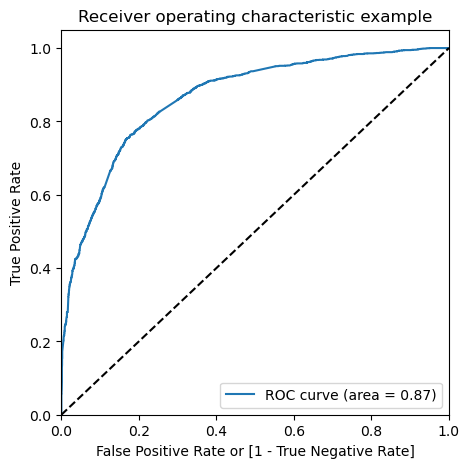

In [177]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

###### Area is 0.87 which seems like a good Model

In [178]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.330830,0,1,1,1,1,0,0,0,0,0,0
1,0,0.089677,0,1,0,0,0,0,0,0,0,0,0
2,1,0.073881,0,1,0,0,0,0,0,0,0,0,0
3,1,0.370009,0,1,1,1,1,0,0,0,0,0,0
4,1,0.961093,1,1,1,1,1,1,1,1,1,1,1


In [179]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)


     prob  accuracy     sensi     speci
0.0   0.0  0.481731  1.000000  0.000000
0.1   0.1  0.572517  0.986040  0.188149
0.2   0.2  0.689980  0.949744  0.448529
0.3   0.3  0.765523  0.898557  0.641869
0.4   0.4  0.787267  0.805491  0.770329
0.5   0.5  0.791078  0.739879  0.838668
0.6   0.6  0.773593  0.668683  0.871107
0.7   0.7  0.740417  0.550954  0.916522
0.8   0.8  0.707241  0.442066  0.953720
0.9   0.9  0.659493  0.312238  0.982266


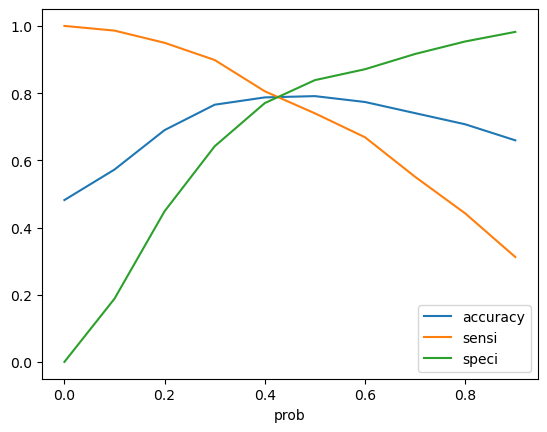

In [180]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [181]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.330830,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.089677,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.073881,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.370009,0,1,1,1,1,0,0,0,0,0,0,0
4,1,0.961093,1,1,1,1,1,1,1,1,1,1,1,1


In [182]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7899574086527684

In [183]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1832,  480],
       [ 457, 1692]], dtype=int64)

In [184]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [185]:
# Calculate Sensitivity

TP/(TP+FN)

0.7873429502093997

In [186]:
# Calculate Specificity

TN/(TN+FP)

0.7923875432525952

##### So 0.4 can be chosen as our final cutoff value

#### Making Predictions on the TEST set 

In [187]:
scaler=StandardScaler()

In [190]:
# Scale the test set as well using just 'transform'

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [189]:
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']]

,TotalVisits,Page Views Per Visit,Total Time Spent on Website
4771,0.0,0.0,0
6122,7.0,7.0,66
9202,4.0,4.0,947
6570,3.0,3.0,861
2668,8.0,4.0,898
...,...,...,...
5828,3.0,1.5,62
6583,3.0,3.0,346
5531,14.0,14.0,1595
3056,3.0,3.0,949


In [191]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[col])

In [192]:
# Check X_test_sm

X_test_sm

,const,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Unreachable
4771,1.0,-0.955492,1,0,1,0,0,0,1,0,0,0,1,0,0,0
6122,1.0,-0.838993,0,0,0,0,0,0,0,0,0,1,0,0,0,0
9202,1.0,0.716094,0,0,0,0,0,0,1,0,0,1,0,0,0,0
6570,1.0,0.564292,0,0,0,0,1,0,1,0,0,1,0,0,0,0
2668,1.0,0.629602,0,0,0,0,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5828,1.0,-0.846053,0,0,0,0,0,0,1,0,0,1,0,0,1,0
6583,1.0,-0.344754,0,0,0,0,0,0,1,0,0,1,0,0,0,0
5531,1.0,1.859903,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3056,1.0,0.719624,0,0,0,0,1,0,1,0,0,1,0,0,0,0


In [194]:
# Drop the required columns from X_test as well

X_test.drop(['Lead Source_Reference', 'What is your current occupation_Housewife', 
             'What is your current occupation_Working Professional', 'Last Notable Activity_Had a Phone Conversation'], axis=1, inplace = True)

In [255]:
X_test.shape

(1912, 74)

In [256]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(X_test_sm)

In [257]:
y_test_pred

4771    0.997081
6122    0.152132
9202    0.726555
6570    0.353072
2668    0.509798
          ...   
5828    0.171313
6583    0.454080
5531    0.775002
3056    0.392812
4088    0.618483
Length: 1912, dtype: float64

In [258]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [259]:
# Let's see the head

y_pred_1.head()

,0
4771,0.997081
6122,0.152132
9202,0.726555
6570,0.353072
2668,0.509798


In [260]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [261]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [262]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [263]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,1,0.997081
1,0,0.152132
2,0,0.726555
3,1,0.353072
4,1,0.509798


In [264]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [265]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.997081
1,0,0.152132
2,0,0.726555
3,1,0.353072
4,1,0.509798


In [266]:
# Make predictions on the test set using 0.45 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [267]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.997081,1
1,0,0.152132,0
2,0,0.726555,1
3,1,0.353072,0
4,1,0.509798,1


In [268]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7881799163179917

In [269]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[788, 208],
       [197, 719]], dtype=int64)

In [270]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [271]:
# Calculate sensitivity
TP / float(TP+FN)

0.7849344978165939

In [272]:
# Calculate specificity
TN / float(TN+FP)

0.7911646586345381

### Checking Precision and Recall

In [273]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[1939,  373],
       [ 559, 1590]], dtype=int64)

In [276]:
from sklearn.metrics import precision_recall_curve

In [277]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4456    1
 4457    0
 4458    0
 4459    0
 4460    0
 Name: Converted, Length: 4461, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 4456    1
 4457    1
 4458    1
 4459    0
 4460    0
 Name: Predicted, Length: 4461, dtype: int64)

In [278]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

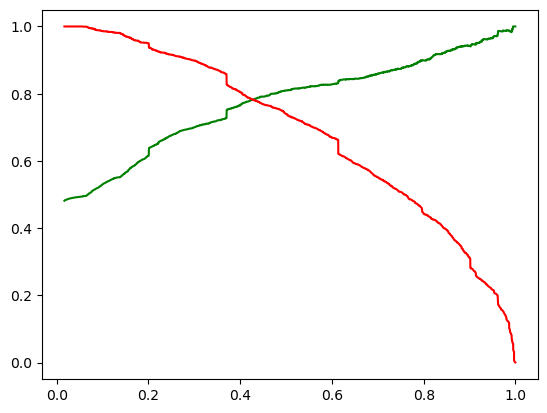

In [279]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [280]:
    y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.330830,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.089677,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.073881,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.370009,0,1,1,1,1,0,0,0,0,0,0,0
4,1,0.961093,1,1,1,1,1,1,1,1,1,1,1,1


In [281]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7917507285362027

In [282]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1865,  447],
       [ 482, 1667]], dtype=int64)

In [283]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [284]:
# Calculate Precision

TP/(TP+FP)

0.7885525070955535

In [285]:
# Calculate Recall

TP/(TP+FN)

0.7757096323871568

# SUMMARY

##### Among a lot of Leads around  9240 only few came out to be as a customers

##### So from the pool of leads Identifying prospects will filter around 20% of leads

##### Carefully watch each lead in order to send out some information or call them to nuture about the course

##### 'TotalVisits' , 'Total Time Spent on Website' , 'Page Views Per Visit' with the help of these features sort out the best Prospects 

##### Focus on converted leads with a lot of help